# Search Lib

# Why this library?

Because we need to understand and see the components of our pipeline more granularly and share those results.

## Downloading Anking Deck

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from search_lib.load_data import download_sqlite_file, get_notes
import pickle

In [3]:
db_path = download_sqlite_file()
db_path

Path('AnKing Step Deck.sqlite')

In [4]:
notes = get_notes(db_path)
notes[0]

Extracted 28664 notes with content


{'id': '10d7cd51-565b-44d6-9858-30cb6ebf51c4',
 'content': 'For instructions on <b>using this deck</b>&nbsp;and&nbsp;<b>using/customizing the note type</b>&nbsp;go to <a href="https://community.ankihub.net/t/wiki-anking-overhaul-for-step-1-2-by-ankingmed/114092?_gl=1*15fqpnu*_ga*MTA1OTEyNjc5Ni4xNjkxODA1MTI5*_ga_T2ZF93TKF6*MTcwNzQxMzQwOS45OTcuMS4xNzA3NDE5NTEwLjAuMC4w">the wiki guide</a><br><br>{{c1::Please note that all organization for this deck is in the <b>tags</b>! There are <u><a href="https://community.ankihub.net/t/why-are-there-no-subdecks-in-the-anking-v12-deck/129271">no subdecks</a></u>}}<br><br>If you are wondering why there are <u>0 cards showing up</u>, see this <a href="https://community.ankihub.net/t/why-does-my-anking-step-deck-have-0-cards/131517">post for the answer</a> Huge thank you to all the&nbsp;<a href="https://community.ankihub.net/docs?topic=134040">contributors &amp; maintainers</a>!&nbsp;<br>To see what is being updated, check the&nbsp;<a href="https://commu

## Pre Search

This module holds anything that happens prior to the search across notes, such as query pre-processing, tag enrichment, etc.

You can use a search function from the search module

In [5]:
from search_lib.pre_search import decompose_query

In [23]:
qry = '''Acute myocardial infarction (AMI) is characterized by sudden chest pain, often described as pressure or tightness, that may radiate to the left arm or jaw. The condition occurs when blood flow to a part of the heart is blocked, typically due to a ruptured atherosclerotic plaque, leading to myocardial cell death. Diagnosis is confirmed through ECG changes, elevated cardiac biomarkers like troponin, and clinical presentation.'''
decompose_query(qry, verbose=False).queries

['Can you write a Haiku?']

# Search

This holds anything that does the main search across all notes

### Dense

In [24]:
from search_lib.search import dense_search, embed_cohere
import os

In [25]:
notes[0]

{'id': '10d7cd51-565b-44d6-9858-30cb6ebf51c4',
 'content': 'For instructions on <b>using this deck</b>&nbsp;and&nbsp;<b>using/customizing the note type</b>&nbsp;go to <a href="https://community.ankihub.net/t/wiki-anking-overhaul-for-step-1-2-by-ankingmed/114092?_gl=1*15fqpnu*_ga*MTA1OTEyNjc5Ni4xNjkxODA1MTI5*_ga_T2ZF93TKF6*MTcwNzQxMzQwOS45OTcuMS4xNzA3NDE5NTEwLjAuMC4w">the wiki guide</a><br><br>{{c1::Please note that all organization for this deck is in the <b>tags</b>! There are <u><a href="https://community.ankihub.net/t/why-are-there-no-subdecks-in-the-anking-v12-deck/129271">no subdecks</a></u>}}<br><br>If you are wondering why there are <u>0 cards showing up</u>, see this <a href="https://community.ankihub.net/t/why-does-my-anking-step-deck-have-0-cards/131517">post for the answer</a> Huge thank you to all the&nbsp;<a href="https://community.ankihub.net/docs?topic=134040">contributors &amp; maintainers</a>!&nbsp;<br>To see what is being updated, check the&nbsp;<a href="https://commu

In [26]:
notes_content = [n['content'] for n in notes]

In [27]:
embeddings_fpath = 'cohere_embeddings.pkl'
if os.path.exists(embeddings_fpath):
    with open(embeddings_fpath, 'rb') as f:
        embeddings = pickle.load(f)
else: 
    embeddings = embed_cohere(notes_content, verbose=True, input_type='search_document')
    with open(embeddings_fpath, 'wb') as f:
        pickle.dump(embeddings, f)

In [28]:
embeddings.shape

(28664, 1024)

In [29]:
res = dense_search(qry, notes, embeddings=embeddings, verbose=True)

2025-05-10 10:56:23.025951 : Embedding 1 documents with embed-english-v3.0...


100%|██████████████████████████████████████████████| 1/1 [00:00<00:00,  2.83it/s]

2025-05-10 10:56:23.381490 : Searching...


In [30]:
sorted_results = sorted(res[0], key=lambda x: x["similarity"], reverse=True)

for r in sorted_results[:5]:
    print(r['content'])
    print('-'*5)

<div><b>Myocardial infarction</b> often presents with severe <i>crushing </i>chest pain <u>lasting {{c1::&gt; 20}} minutes</u> that radiates to the {{c2::<b>left arm</b>}} or {{c2::<b>jaw</b>}} </div> Other symptoms include <b>diaphoresis</b>, <b>nausea</b>, vomiting, severe retrosternal pain, <b>shortness of breath</b>, and fatigue     <div><i><img src="paste-296039210812552.jpg"></i></div><br> <img src="bde56c5d21fe142edba03359678155de.webp"><img src="1342fb2a84d994e8e5ae58fee322ea02.webp"><img src="1bc6e745a3cbf3b2a79dd3ba4d184c41.webp"><br><a href="https://dashboard.sketchy.com/study/medical/courses/medical-pathophysiology/units/medical-pathophysiology-cardiac/videos/medical-pathophysiology-cardiac-ischemic-heart-disease-acute-myocardial-infarction-and-post-mi-timeline?utm_source=anki&amp;utm_medium=partnership&amp;utm_campaign=february_update&amp;utm_content=medical">Watch Acute Myocardial Infarction &amp; Post MI Timeline</a> <img src="65402f0d7d58bdf6c07550e6fc9a4101.webp"><br><

### Sparse

In [19]:
from search_lib.search import sparse_search, tokenize_notes

In [20]:
tokens = tokenize_notes(notes, verbose=True)

2025-05-08 16:15:33.827611 : Tokenizing 28664 notes...


Split strings:   0%|          | 0/28664 [00:00<?, ?it/s]

In [21]:
res = sparse_search(qry, notes, tokens)

BM25S Count Tokens:   0%|          | 0/28664 [00:00<?, ?it/s]

BM25S Compute Scores:   0%|          | 0/28664 [00:00<?, ?it/s]

Split strings:   0%|          | 0/1 [00:00<?, ?it/s]

BM25S Retrieve:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
###
### Example of making a function to make looking through arbitrary things easy
### This was 1 shot by AI with 0 changes in a few seconds - sometimes that's enough for quick and easy viewing and doesn't need to be abstracted
###
import ipywidgets as widgets
from IPython.display import display, HTML
import json
from typing import Dict, Any

def display_card(result: Dict[Any, Any]) -> None:
    """Display a flashcard with its content and tags in a pleasant format."""
    # Extract content and tags
    content = result.get('content', '')
    tags = result.get('tags', [])
    
    # Create HTML for content
    content_html = f"""
    <div style="border: 1px solid #ddd; border-radius: 8px; padding: 15px; margin-bottom: 15px; background-color: white;">
        <div style="margin-bottom: 10px;">
            {content}
        </div>
    </div>
    """
    
    # Create tags display
    tags_html = '<div style="display: flex; flex-wrap: wrap; gap: 5px; margin-bottom: 15px;">'
    for tag in tags:
        # Remove common prefixes for cleaner display
        clean_tag = tag.replace('#AK_Step1_v12::', '').replace('#AK_Step2_v12::', '')
        clean_tag = clean_tag.replace('!AK_UpdateTags::', '').replace('#PANCE::', '')
        clean_tag = clean_tag.replace('#AK_Original_Decks::', '')
        tags_html += f'<span style="background-color: #f0f0f0; padding: 5px 10px; border-radius: 15px; font-size: 12px;">{clean_tag}</span>'
    tags_html += '</div>'
    
    # Display the content and tags
    display(HTML(content_html + tags_html))

# Example usage:
display_card(res[0])

# Post Search

This holds anything that happens after the primary search, such as reranking.

In [31]:
from search_lib.post_search import cohere_rerank, llm_rerank

In [54]:
cohere_rerank

<function search_lib.post_search.cohere_rerank(query, notes, top_k=5, **kwargs)>

In [57]:
rerank_res = cohere_rerank(qry, res)

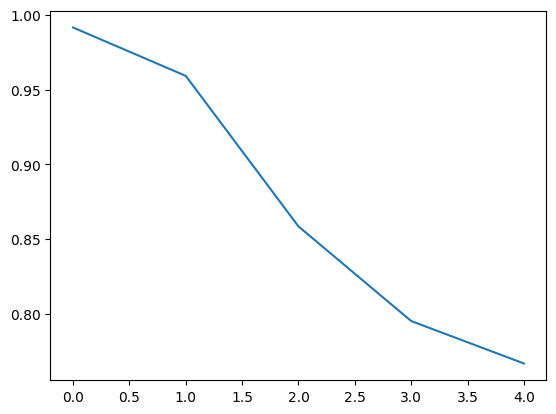

In [58]:
plt.plot([r.relevance_score for r in rerank_res.results]); plt.show()